In [1]:
import numpy as np 
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
from persim import plot_diagrams
import matplotlib.gridspec as gridspec
import ripser

In [2]:
directory = r"trial_matrices"

for name in sorted(os.listdir(directory)):
    file_path = os.path.join(directory, name)

    if os.path.isfile(file_path) and name.endswith('.pickl'):
        try:
            with open(file_path, 'rb') as f:
                print(f"Distance matrix of {name}")
                data = pickle.load(f)
                covar_matrix = data.get('covariance matrix')
                
                if dist_matrix is None:
                    print(f"Distance matrix not found in {name}")
                    
        except (pickle.UnpicklingError, EOFError, KeyError) as e:
            print(f"Error loading {name}: {e}")
            continue
    
    num_cols = dist_matrix.shape[1]
    cols_list = np.arange(1, num_cols + 1)

## Not all files

In [3]:
# try running only one 
file_path = r"trial_matrices/110 2013-09-26 00_00_00.pickl"

with open(file_path, 'rb') as f:
    print(f"Distance matrix of 110 2013-09-26 00_00_00.pickl")
    data = pickle.load(f)
    dist_matrix = data.get('distance matrix')
    covar_matrix = data.get('covariance matrix')

dist_matrix = np.nan_to_num(dist_matrix, nan=0.0, posinf=0.0, neginf=0.0)

Distance matrix of 110 2013-09-26 00_00_00.pickl


/tmp/ipykernel_34039/3473388515.py:6: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(f)


In [4]:
print("Distance Matrix Shape:", dist_matrix.shape)
print("Distance Matrix Stats:")
print("Min:", np.min(dist_matrix))
print("Max:", np.max(dist_matrix))
print("Mean:", np.mean(dist_matrix))
print("Standard Deviation:", np.std(dist_matrix))

Distance Matrix Shape: (193, 193)
Distance Matrix Stats:
Min: 0.0
Max: 0.9999999999921242
Mean: 0.9338522164644938
Standard Deviation: 0.19221654682593062


In [5]:
# make the list of columns
num_cols = dist_matrix.shape[1]
cols_list = np.arange(1, num_cols + 1)

### Covariance matrix

This is for getting the eigenvalues.

Note: I did not use `eigs = pca.explained_variance_` because this is used to determine the importance of each principal component and does not find the contributing stocks.

In [17]:
# Perform PCA
pca = PCA(n_components=2)
pca.fit(covar_matrix)
eigvecs = pca.components_

# stocks_eig1 = [(idx, cols_list[idx]) for idx in np.argsort(-np.abs(eigvecs[0]))]
# stocks_eig2 = [(idx, cols_list[idx]) for idx in np.argsort(-np.abs(eigvecs[1]))]

stocks_eig1 = sorted([int(idx) + 1 for idx in np.argsort(-np.abs(eigvecs[0]))])
stocks_eig2 = sorted([int(idx) + 1 for idx in np.argsort(-np.abs(eigvecs[1]))])

print(f"Total number of stocks: {num_cols}")
print(f"\nStocks contributing to Principal Component 1:\n {stocks_eig1}")
print(f"\nStocks contributing to Principal Component 2:\n {stocks_eig2}")

Total number of stocks: 193

Stocks contributing to Principal Component 1:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193]

Stocks contributing to Principal Component 2:
 [1, 2, 3, 4, 5, 6,

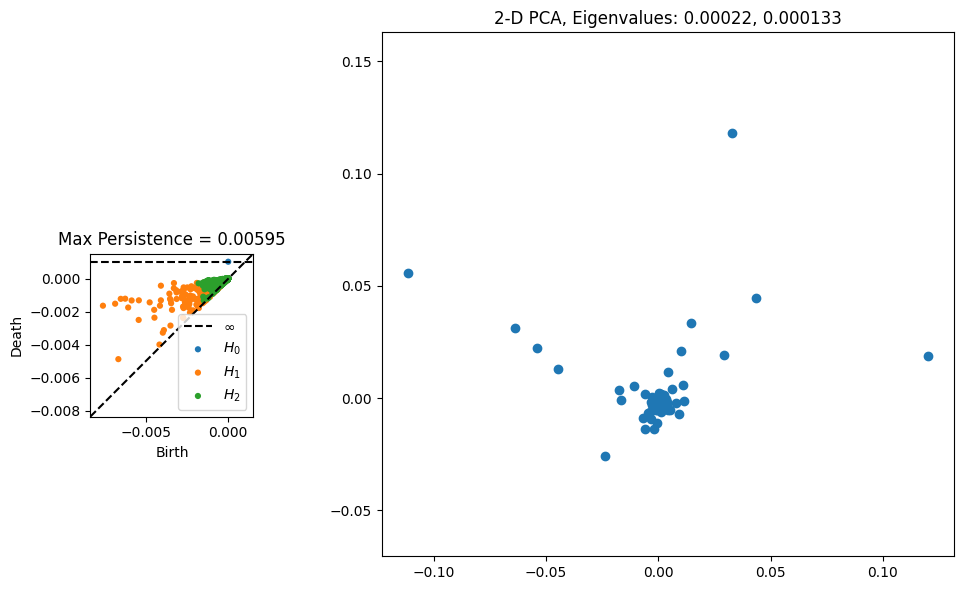

In [19]:
# rips filtration
pers_diag = ripser.ripser(covar_matrix, distance_matrix=True, maxdim=2)
PDs = pers_diag['dgms']
I = PDs[1]

Y = pca.transform(covar_matrix)
eigs = pca.explained_variance_

# Plotting
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 2], height_ratios=[2, 2, 1])

# Plot persistence diagram
ax2 = plt.subplot(gs[1, 0])
plot_diagrams(PDs)
plt.title(f"Max Persistence = {np.max(I[:, 1] - I[:, 0]):.3g}")

# Plot PCA 2D projection
ax3 = plt.subplot(gs[:, 1])
ax3.scatter(Y[:, 0], Y[:, 1])
plt.axis("equal")
plt.title(f"2-D PCA, Eigenvalues: {eigs[0]:.3g}, {eigs[1]:.3g}")

plt.tight_layout()
plt.show()

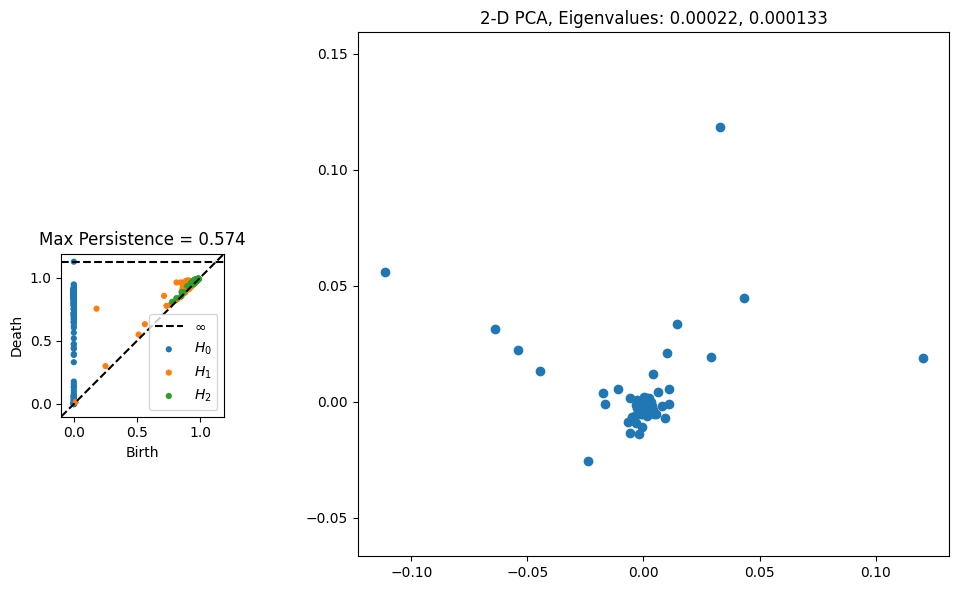

In [18]:
# rips filtration
pers_diag = ripser.ripser(dist_matrix, distance_matrix=True, maxdim=2)
PDs = pers_diag['dgms']
I = PDs[1]

Y = pca.transform(covar_matrix)
eigs = pca.explained_variance_

# Plotting
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 2], height_ratios=[2, 2, 1])

# Plot persistence diagram
ax2 = plt.subplot(gs[1, 0])
plot_diagrams(PDs)
plt.title(f"Max Persistence = {np.max(I[:, 1] - I[:, 0]):.3g}")

# Plot PCA 2D projection
ax3 = plt.subplot(gs[:, 1])
ax3.scatter(Y[:, 0], Y[:, 1])
plt.axis("equal")
plt.title(f"2-D PCA, Eigenvalues: {eigs[0]:.3g}, {eigs[1]:.3g}")

plt.tight_layout()
plt.show()

### Distance matrix

This is for testing and getting the optimal number of n_components.

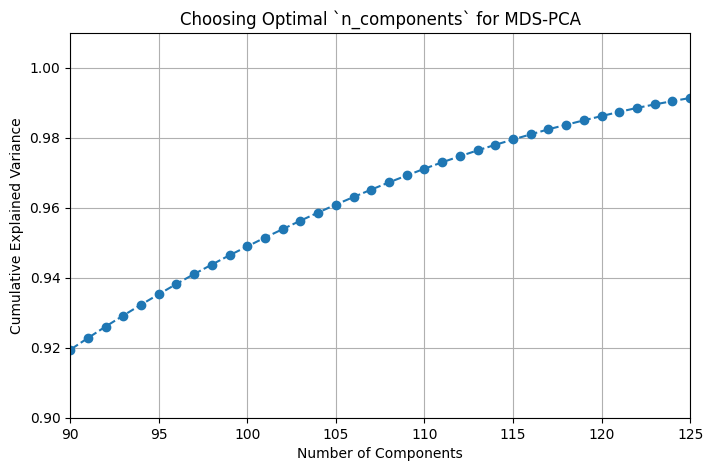

In [8]:
# Apply MDS with a large number of dimensions
mds = MDS(n_components=num_cols-1, dissimilarity="precomputed", random_state=42)
embedded_coords = mds.fit_transform(dist_matrix)

# Apply PCA
pca = PCA()
pca.fit(embedded_coords)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.ylim(0.9, 1.01)
plt.xlim(90, 125)
plt.title("Choosing Optimal `n_components` for MDS-PCA")
plt.grid()
plt.show()

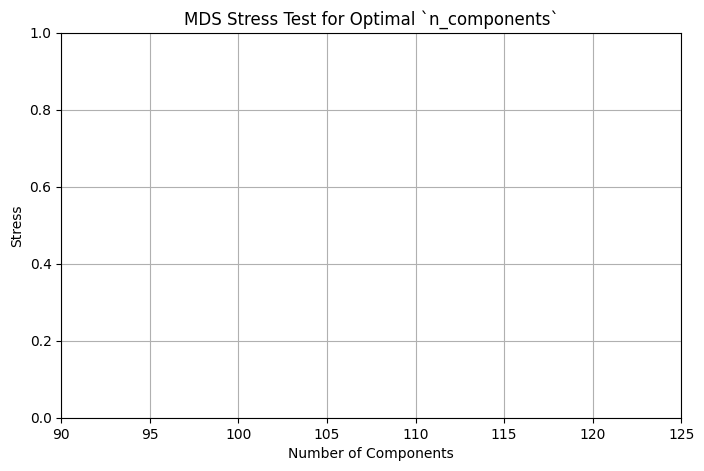

In [9]:
stress_values = []
dimensions = range(1, num_cols)

for dim in dimensions:
    mds = MDS(n_components=dim, dissimilarity="precomputed", random_state=42)
    mds.fit(dist_matrix)
    stress_values.append(mds.stress_)

plt.figure(figsize=(8,5))
plt.plot(dimensions, stress_values, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Stress")
plt.ylim(0, 1)
plt.xlim(90, 125)
plt.title("MDS Stress Test for Optimal `n_components`")
plt.grid()
plt.show()

This is for converting the distance matrix into coordinates.

In [10]:
mds = MDS(n_components=105, dissimilarity="precomputed", random_state=42)
coordinates = mds.fit_transform(dist_matrix)

This is for getting the eigenvalues.

Note: I did not use `eigs = pca.explained_variance_` because this is used to determine the importance of each principal component and does not find the contributing stocks.

In [11]:
# Perform PCA
pca = PCA(n_components=2)
pca.fit(coordinates)
eigvecs = pca.components_

# stocks_eig1 = [(idx, cols_list[idx]) for idx in np.argsort(-np.abs(eigvecs[0]))]
# stocks_eig2 = [(idx, cols_list[idx]) for idx in np.argsort(-np.abs(eigvecs[1]))]

stocks_eig1 = sorted([int(idx) + 1 for idx in np.argsort(-np.abs(eigvecs[0]))])
stocks_eig2 = sorted([int(idx) + 1 for idx in np.argsort(-np.abs(eigvecs[1]))])

print(f"Total number of stocks: {num_cols}")
print(f"\nStocks contributing to Principal Component 1:\n {stocks_eig1}")
print(f"\nStocks contributing to Principal Component 2:\n {stocks_eig2}")

Total number of stocks: 193

Stocks contributing to Principal Component 1:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]

Stocks contributing to Principal Component 2:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]


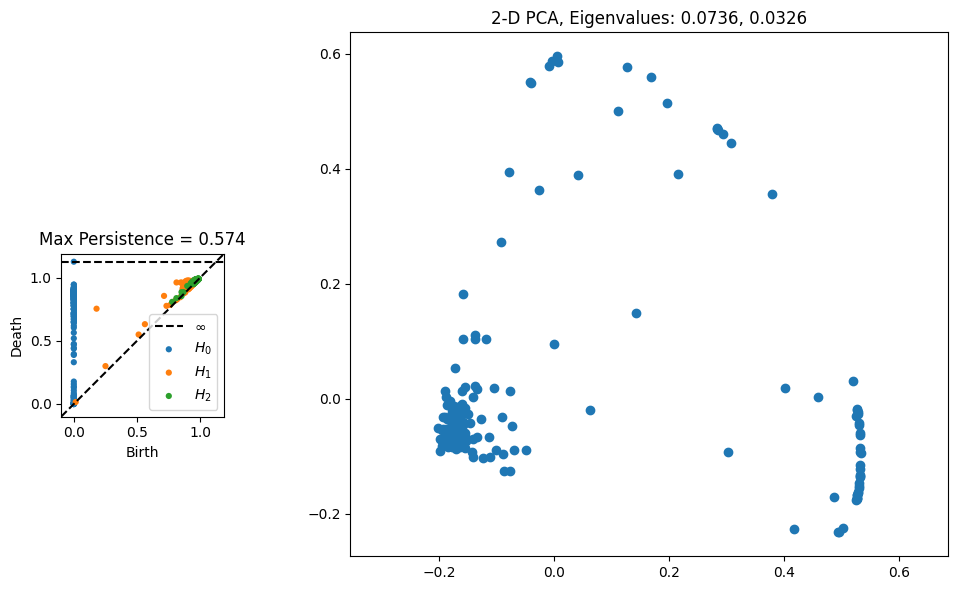

In [12]:
# rips filtration
pers_diag = ripser.ripser(dist_matrix, distance_matrix=True, maxdim=2)
PDs = pers_diag['dgms']
I = PDs[1]

Y = pca.transform(coordinates)
eigs = pca.explained_variance_

# Plotting
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 2], height_ratios=[2, 2, 1])

# Plot persistence diagram
ax2 = plt.subplot(gs[1, 0])
plot_diagrams(PDs)
plt.title(f"Max Persistence = {np.max(I[:, 1] - I[:, 0]):.3g}")

# Plot PCA 2D projection
ax3 = plt.subplot(gs[:, 1])
ax3.scatter(Y[:, 0], Y[:, 1])
plt.axis("equal")
plt.title(f"2-D PCA, Eigenvalues: {eigs[0]:.3g}, {eigs[1]:.3g}")

plt.tight_layout()
plt.show()


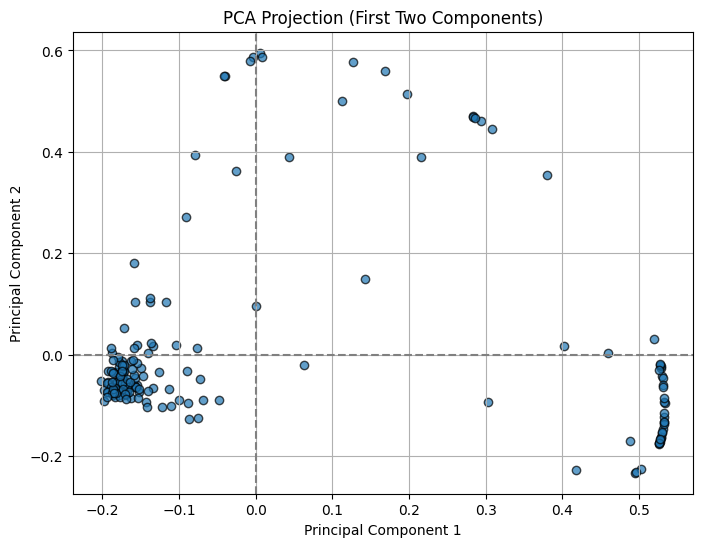

In [14]:
# Project data onto first two principal components
X_pca = pca.transform(coordinates)[:, :2]  # Take first two principal components

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (First Two Components)")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()
